In [102]:
import pandas as pd
import numpy as np

In [124]:
covidData = pd.read_excel("../../database/novosDados/suporte_dados_pp_Jan2021.xlsx")

In [132]:
# Visualizando Dados
# covidData.head()
covidData['SUPORT_VEN'].value_counts()

2    439
1    193
3    119
Name: SUPORT_VEN, dtype: int64

In [126]:
attributes = ['CLASSI_FIN', 'DT_INTERNA', 'DT_EVOLUCA']
covidData = covidData.drop(columns = attributes)
covidData.shape

(751, 27)

In [78]:
dfColumns = covidData.columns

for i in range(0, len(dfColumns)):
    index = dfColumns[i]
    #print(covidData[index].value_counts())

M    454
F    297
Name: CS_SEXO, dtype: int64
58     19
66     19
73     18
53     18
63     17
       ..
106     1
18      1
23      1
17      1
20      1
Name: NU_IDADE_N, Length: 82, dtype: int64
4.0    519
1.0    197
2.0     19
3.0      8
9.0      5
Name: CS_RACA, dtype: int64
2.0    719
1.0     20
9.0      6
Name: SURTO_SG, dtype: int64
1.0    500
2.0    145
9.0      1
Name: FEBRE, dtype: int64
1.0    554
2.0    113
9.0      3
Name: TOSSE, dtype: int64
2.0    367
1.0    128
9.0     15
Name: GARGANTA, dtype: int64
1.0    630
2.0     66
9.0      1
Name: DISPNEIA, dtype: int64
1.0    590
2.0     84
9.0      3
Name: DESC_RESP, dtype: int64
1.0    523
2.0    119
9.0      5
Name: SATURACAO, dtype: int64
2.0    369
1.0    107
9.0     15
Name: DIARREIA, dtype: int64
2.0    397
1.0     66
9.0     18
Name: VOMITO, dtype: int64
1    539
2    212
Name: FATOR_RISC, dtype: int64
2.0    290
1.0      2
Name: PUERPERA, dtype: int64
2.0    246
1.0    236
Name: CARDIOPATI, dtype: int64
2.0    290
1.

In [106]:
# len(covidData[covidData.FEBRE == 1].index)
covidData.columns

Index(['CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'SURTO_SG', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO',
       'FATOR_RISC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
       'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
       'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'SUPORT_VEN'],
      dtype='object')

In [127]:
#create pandas DataFrame

atributos = ['SURTO_SG', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO',
       'FATOR_RISC', 'PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
       'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI',
       'IMUNODEPRE', 'RENAL', 'OBESIDADE']
# , 'UTI'

positivos = []
negativos = []
ignorados = []
nulos = []
total = []

In [128]:
for i in range(0, len(atributos)):
    valor = atributos[i]
    positivos.append(len(covidData[covidData[valor] == 1].index))
    negativos.append(len(covidData[covidData[valor] == 2].index))
    ignorados.append(len(covidData[covidData[valor] == 9].index))
    nulos.append(len(covidData[covidData[valor].isnull()].index))
    total.append(positivos[i] + negativos[i] + ignorados[i] + nulos[i])

In [129]:
#create pandas DataFrame
covidQnt = pd.DataFrame({'Dado': atributos,
                   'Positivo': positivos,
                   'Negativo': negativos,
                   'Ignorado': ignorados,
                   'Nulos': nulos})
covidQnt

,Dado,Positivo,Negativo,Ignorado,Nulos
0,SURTO_SG,20,719,6,6
1,FEBRE,500,145,1,105
2,TOSSE,554,113,3,81
3,GARGANTA,128,367,15,241
4,DISPNEIA,630,66,1,54
5,DESC_RESP,590,84,3,74
6,SATURACAO,523,119,5,104
7,DIARREIA,107,369,15,260
8,VOMITO,66,397,18,270
9,FATOR_RISC,539,212,0,0


<AxesSubplot:title={'center':'Percentage Stacked Bar Graph'}, ylabel='Dado'>

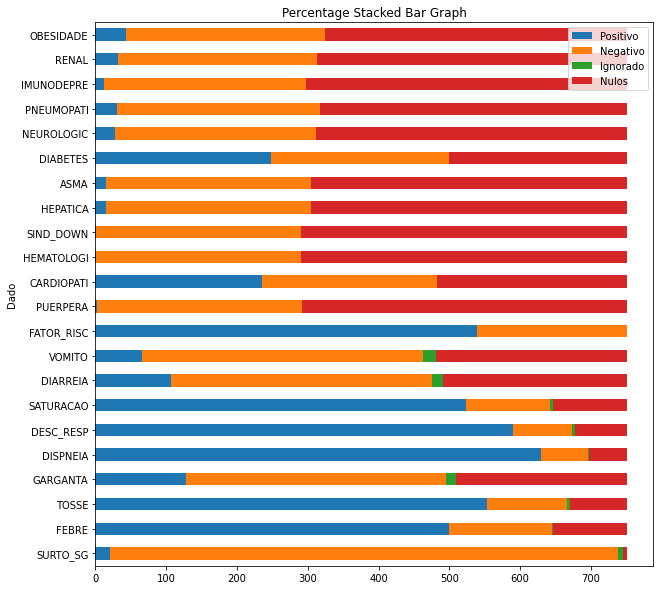

In [130]:
import matplotlib.pyplot as plt 

plt.rcParams["figure.figsize"] = (10,10)

covidQnt.plot( 
  x = 'Dado',  
  kind = 'barh',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True) 

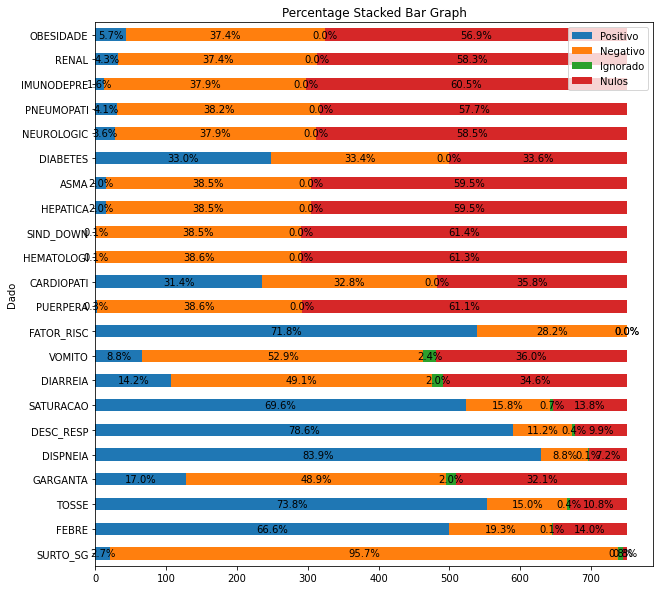

In [131]:
import matplotlib.pyplot as plt 
df = covidQnt

df.plot( 
  x = 'Dado',  
  kind = 'barh',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True) 
  
df_total = df["Positivo"] + df["Negativo"] + df["Ignorado"] + df["Nulos"] 
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],  
                                         df[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',  
                 va = 'center', ha = 'center')

In [108]:
atributosRemovidos = ["ASMA", "HEPATICA", "SIND_DOWN", "HEMATOLOGI", "NEUROLOGIC", "PNEUMOPATI", 
                      "IMUNODEPRE", "RENAL", "OBESIDADE", "PUERPERA"]

covidData = covidData.drop(columns = atributosRemovidos)


# Preencher os vazios
# converter idade
# converter o sexo

In [109]:
covidData.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,SUPORT_VEN
0,F,50,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,1.0,2.0,2
1,M,65,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,2.0,1.0,2
2,M,58,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2,2.0,2.0,1
3,M,58,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1,2.0,1.0,1
4,M,70,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2,2.0,2.0,2


In [110]:
# Substituindo os valores NaN por 2
valor = 2
atributosComNaN = {"SURTO_SG": valor, "FEBRE": valor, "TOSSE": valor, "GARGANTA": valor, "DISPNEIA": valor, 
                   "DESC_RESP": valor, "SATURACAO": valor, "DIARREIA": valor, "VOMITO": valor, 
                   "CARDIOPATI": valor, "DIABETES": valor}

covidData.fillna(value = atributosComNaN, inplace = True)

In [111]:
covidData['DIABETES'].value_counts()

2.0    503
1.0    248
Name: DIABETES, dtype: int64

In [112]:
# Substituindo os valores de Sexo
covidData['CS_SEXO'].replace('F', 0, inplace = True);
covidData['CS_SEXO'].replace('M', 1, inplace = True);
covidData['CS_SEXO'].value_counts()

1    454
0    297
Name: CS_SEXO, dtype: int64

In [113]:
atributosComNaN = ["SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", 
                   "DESC_RESP", "SATURACAO", "DIARREIA", "VOMITO" 
                   "CARDIOPATI", "DIABETES"]

for i in range(0, len(atributosComNaN)):
    elemento = atributos[i]
    covidData[elemento] = covidData[elemento].map({1:1, 2:2, 9:2})

In [114]:
covidData['SATURACAO'].value_counts()
covidData.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,SUPORT_VEN
0,0,50,4.0,2,1,1,1,1,1,1,2,2,1,1.0,2.0,2
1,1,65,4.0,2,1,1,1,1,1,1,2,2,1,2.0,1.0,2
2,1,58,4.0,2,1,1,2,1,1,1,1,2,2,2.0,2.0,1
3,1,58,4.0,2,1,1,2,1,1,1,2,2,1,2.0,1.0,1
4,1,70,4.0,2,1,1,2,1,1,1,2,2,2,2.0,2.0,2


In [115]:
for i in range (0, 12):
    covidData['NU_IDADE_N'].replace(i, '1', inplace = True)
    
for i in range (12, 18):
    covidData['NU_IDADE_N'].replace(i, '2', inplace = True)
    
for i in range (18, 28):
    covidData['NU_IDADE_N'].replace(i, '3', inplace = True)

for i in range (28, 38):
    covidData['NU_IDADE_N'].replace(i, '4', inplace = True)

for i in range (38, 48):
    covidData['NU_IDADE_N'].replace(i, '5', inplace = True)

for i in range (48, 58):
    covidData['NU_IDADE_N'].replace(i, '6', inplace = True)

for i in range (58, 68):
    covidData['NU_IDADE_N'].replace(i, '7', inplace = True)

for i in range (68, 78):
    covidData['NU_IDADE_N'].replace(i, '8', inplace = True)
    
for i in range (78, 88):
    covidData['NU_IDADE_N'].replace(i, '9', inplace = True)
    
for i in range (88, 120):
    covidData['NU_IDADE_N'].replace(i, '10', inplace = True)

In [116]:
covidData["NU_IDADE_N"].unique()

array(['6', '7', '8', '3', '5', '10', '4', '9', '2', '1'], dtype=object)

In [117]:
race_values = {'CS_RACA' : 4}
covidData.fillna(value = race_values, inplace = True)
covidData['CS_RACA'].value_counts()

4.0    522
1.0    197
2.0     19
3.0      8
9.0      5
Name: CS_RACA, dtype: int64

In [118]:
covidData['CS_RACA'] = covidData['CS_RACA'].map({1:1, 2:2, 3:3, 4:4, 9:4})
covidData['CS_RACA'].value_counts()

4    527
1    197
2     19
3      8
Name: CS_RACA, dtype: int64

In [119]:
covidData.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,SUPORT_VEN
0,0,6,4,2,1,1,1,1,1,1,2,2,1,1.0,2.0,2
1,1,7,4,2,1,1,1,1,1,1,2,2,1,2.0,1.0,2
2,1,7,4,2,1,1,2,1,1,1,1,2,2,2.0,2.0,1
3,1,7,4,2,1,1,2,1,1,1,2,2,1,2.0,1.0,1
4,1,8,4,2,1,1,2,1,1,1,2,2,2,2.0,2.0,2


In [121]:
covidData['SUPORT_VEN'] = covidData['SUPORT_VEN'].map({1:1, 2:1, 3: 0})
covidData['SUPORT_VEN'].value_counts()

1    632
0    119
Name: SUPORT_VEN, dtype: int64

In [122]:
write = pd.ExcelWriter('suporte_dados_final_Jan2021.xlsx')
covidData.to_excel(write, 'dados', index = False)
write.save()